# Lab 8: Linear Classifiers

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, cohen_kappa_score, make_scorer)
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

In [236]:
weed = pd.read_csv("/Users/alexandra/Desktop/GSB-544/Labs/Lab8/cannabis_full.csv")
weed.dropna(inplace=True)
weed.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part One: Binary Classification

Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

1. Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

2. Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

3. Report the (cross-validated!) metric.

4. Fit the final model.

5. Output a confusion matrix.

For these models:
Q1: LDA
Q2: QDA
Q3: SVC
Q4: SVM


## Q1: LDA

In [237]:
#filter weed by type
weed_type = weed[weed["Type"].isin(["sativa", "indica"])]
weed_type.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [238]:
# encode to have type as numeric values
le = LabelEncoder()
weed_type["Type_encoded"] = le.fit_transform(weed_type["Type"])

In [239]:
# define variables
X = weed_type.drop(columns=["Strain", "Type", "Type_encoded", "Effects", "Flavor"])
y = weed_type["Type_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

#  create pipeline 
preprocessor = Pipeline([
    ("scaler", StandardScaler())
])

In [240]:

# function for evaluating all  models
def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    # grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, target_names= le.classes_)
    return grid_search.best_params_, grid_search.best_score_, conf_matrix, report


In [241]:
# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_param_grid = {}
lda_results = evaluate_model(lda_model, lda_param_grid, X_train, y_train, X_test, y_test)

#chatgpt helped
print("LDA Results")
print("Best Parameters:", lda_results[0])
print("Cross-validated accuracy:", lda_results[1])
print("Confusion Matrix:\n", lda_results[2])
print("Classification Report:\n", lda_results[3])


LDA Results
Best Parameters: {}
Cross-validated accuracy: 0.8548469212246301
Confusion Matrix:
 [[125   7]
 [ 23  59]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.84      0.95      0.89       132
      sativa       0.89      0.72      0.80        82

    accuracy                           0.86       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.86      0.86      0.86       214

LDA Results
Best Parameters: {}
Cross-validated accuracy: 0.8548469212246301
Confusion Matrix:
 [[125   7]
 [ 23  59]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.84      0.95      0.89       132
      sativa       0.89      0.72      0.80        82

    accuracy                           0.86       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.86      0.86      0.86       214



I am going to look at accuracy for my metric because it is easy to understand. It shows the proportion of correct predictions over the overall predictions. It is easy to glance at the number and gauge how the model is doing at predicting. Also our dataset is pretty even so the number should be pretty balanced.

## Q2. QDA

In [242]:
import os
import warnings

os.environ["MallocStackLogging"] = "0"
warnings.filterwarnings("ignore")

In [243]:
# QDA Model
qda_model = QuadraticDiscriminantAnalysis()
qda_param_grid = {"classifier__reg_param" :[0,.1,.25,.5,.75,1]}  
qda_results = evaluate_model(qda_model, qda_param_grid, X_train, y_train, X_test, y_test)

print("QDA Results")
print("Best Parameters:", qda_results[0])
print("Cross-validated accuracy:", qda_results[1])
print("Confusion Matrix:\n", qda_results[2])
print("Classification Report:\n", qda_results[3])

QDA Results
Best Parameters: {'classifier__reg_param': 1}
Cross-validated accuracy: 0.866577227382181
Confusion Matrix:
 [[122  10]
 [ 19  63]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.87      0.92      0.89       132
      sativa       0.86      0.77      0.81        82

    accuracy                           0.86       214
   macro avg       0.86      0.85      0.85       214
weighted avg       0.86      0.86      0.86       214

QDA Results
Best Parameters: {'classifier__reg_param': 1}
Cross-validated accuracy: 0.866577227382181
Confusion Matrix:
 [[122  10]
 [ 19  63]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.87      0.92      0.89       132
      sativa       0.86      0.77      0.81        82

    accuracy                           0.86       214
   macro avg       0.86      0.85      0.85       214
weighted avg       0.86      0.86      0.86       214



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/F

## Q3: SVC

In [244]:
# SVC Model
svc_model = SVC(kernel='poly')  # Limiting to polynomial kernel

svc_param_grid = {
    "classifier__C": [0.1, 1, 10, 100], #CHATGPT HELPED
    "classifier__degree": [2, 3, 4],  # Degree of the polynomial kernel
}

# Evaluate model using the evaluate_model function
svc_results = evaluate_model(svc_model, svc_param_grid, X_train, y_train, X_test, y_test)

# Print results
print("SVC Results")
print("Best Parameters:", svc_results[0])
print("Cross-validated accuracy:", svc_results[1])
print("Confusion Matrix:\n", svc_results[2])
print("Classification Report:\n", svc_results[3])

SVC Results
Best Parameters: {'classifier__C': 100, 'classifier__degree': 3}
Cross-validated accuracy: 0.8360784313725489
Confusion Matrix:
 [[116  16]
 [ 27  55]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.81      0.88      0.84       132
      sativa       0.77      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80      0.80      0.80       214

SVC Results
Best Parameters: {'classifier__C': 100, 'classifier__degree': 3}
Cross-validated accuracy: 0.8360784313725489
Confusion Matrix:
 [[116  16]
 [ 27  55]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.81      0.88      0.84       132
      sativa       0.77      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80  

## Q4: SVM

In [245]:

# SVM Model (using SVC)
svm_model = SVC(kernel='poly')  # Polynomial kernel

# Define parameter grid
svm_param_grid = {
    "classifier__C": [0.1, 1, 10, 100],  
    "classifier__degree": [2, 3, 4], 
}

# Evaluate model using the evaluate_model function
svm_results = evaluate_model(svm_model, svm_param_grid, X_train, y_train, X_test, y_test)

# Print results
print("SVM Results")
print("Best Parameters:", svm_results[0])
print("Cross-validated accuracy:", svm_results[1])
print("Confusion Matrix:\n", svm_results[2])
print("Classification Report:\n", svm_results[3])


SVM Results
Best Parameters: {'classifier__C': 100, 'classifier__degree': 3}
Cross-validated accuracy: 0.8360784313725489
Confusion Matrix:
 [[116  16]
 [ 27  55]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.81      0.88      0.84       132
      sativa       0.77      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80      0.80      0.80       214

SVM Results
Best Parameters: {'classifier__C': 100, 'classifier__degree': 3}
Cross-validated accuracy: 0.8360784313725489
Confusion Matrix:
 [[116  16]
 [ 27  55]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.81      0.88      0.84       132
      sativa       0.77      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80  

# Part 2: Natural Multiclass

Now use the full dataset, including the Hybrid strains.

## Q1: Fit a decision tree, plot the final fit, and interpret the results.

In [246]:
# encode weed dataset
le = LabelEncoder()
weed["Type_encoded"] = le.fit_transform(weed["Type"])
# define variables
X = weed.drop(columns=["Strain", "Type", "Type_encoded", "Effects", "Flavor"])
y = weed["Type_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [247]:
#decsion tree

dt_pipeline = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])
param_grid_dt = {"dt__max_depth": [3, 5, 10, None], "dt__min_samples_split": [2, 5, 10]}
dt_grid = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring="accuracy")
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Cross-validated Accuracy:", dt_grid.best_score_)
dt_cm = confusion_matrix(y_test, best_dt.predict(X_test), labels=best_dt.named_steps["dt"].classes_)

Best Decision Tree Parameters: {'dt__max_depth': 3, 'dt__min_samples_split': 2}
Cross-validated Accuracy: 0.6244167684167683
Best Decision Tree Parameters: {'dt__max_depth': 3, 'dt__min_samples_split': 2}
Cross-validated Accuracy: 0.6244167684167683


Accuracy: 0.621867881548975
Accuracy: 0.621867881548975


Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66       225
           1       0.64      0.61      0.63       132
           2       0.55      0.44      0.49        82

    accuracy                           0.62       439
   macro avg       0.61      0.58      0.59       439
weighted avg       0.62      0.62      0.62       439

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66       225
           1       0.64      0.61      0.63       132
           2       0.55      0.44      0.49        82

    accuracy                           0.62       439
   macro avg       0.61      0.58      0.59       439
weighted avg       0.62      0.62      0.62       439



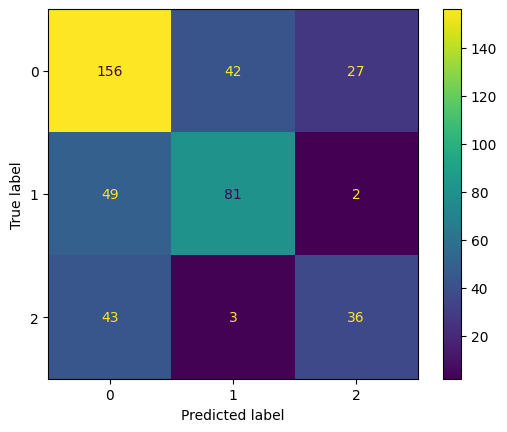

In [248]:
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3,min_samples_split = 2) 
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print("Classification Report:\n", classification_report(y_test, y_pred))

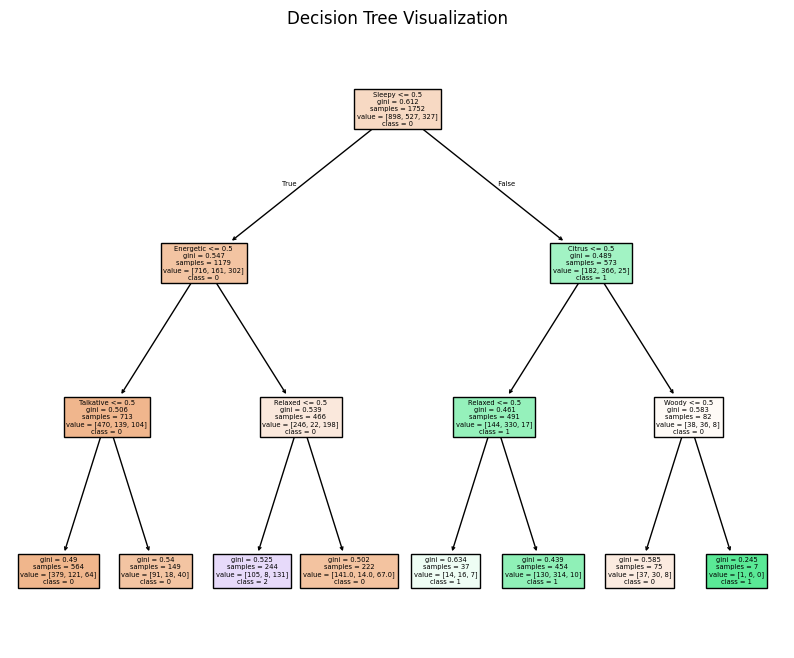

In [249]:
tree_model = best_dt.named_steps["dt"]  

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(
    tree_model,
    feature_names=X.columns,  
    class_names=[str(cls) for cls in tree_model.classes_], 
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()

## Q2: Repeat the analyses from Part One for LDA, QDA, and KNN.

### LDA 

LDA Accuracy: 0.6195899772209568
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65       225
           1       0.64      0.67      0.65       132
           2       0.51      0.45      0.48        82

    accuracy                           0.62       439
   macro avg       0.60      0.59      0.59       439
weighted avg       0.62      0.62      0.62       439

LDA Accuracy: 0.6195899772209568
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65       225
           1       0.64      0.67      0.65       132
           2       0.51      0.45      0.48        82

    accuracy                           0.62       439
   macro avg       0.60      0.59      0.59       439
weighted avg       0.62      0.62      0.62       439



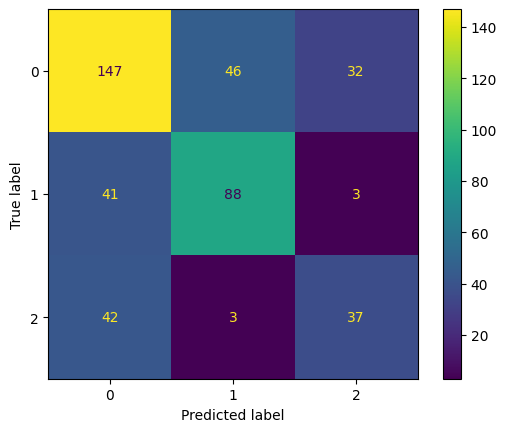

In [250]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lda = lda_model.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

# cm
cm_lda = confusion_matrix(y_test, y_pred_lda)
ConfusionMatrixDisplay(cm_lda).plot()

# classification report
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))


### QDA

QDA Accuracy: 0.2619589977220957
QDA Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.03      0.05       225
           1       0.58      0.23      0.33       132
           2       0.21      0.96      0.34        82

    accuracy                           0.26       439
   macro avg       0.46      0.41      0.24       439
weighted avg       0.52      0.26      0.19       439

QDA Accuracy: 0.2619589977220957
QDA Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.03      0.05       225
           1       0.58      0.23      0.33       132
           2       0.21      0.96      0.34        82

    accuracy                           0.26       439
   macro avg       0.46      0.41      0.24       439
weighted avg       0.52      0.26      0.19       439



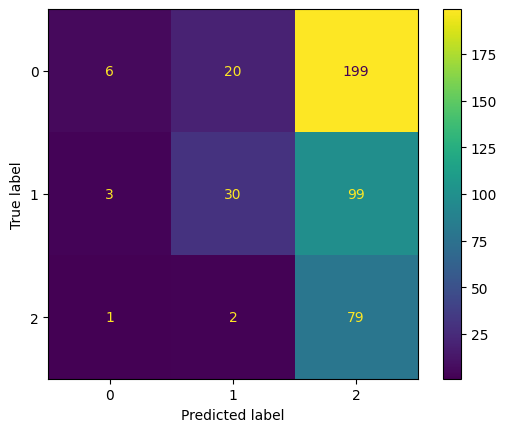

In [251]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# preds
y_pred_qda = qda_model.predict(X_test)
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))

# cm
cm_qda = confusion_matrix(y_test, y_pred_qda)
ConfusionMatrixDisplay(cm_qda).plot()

# Classification report
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda))


### KNN

Best KNN Parameters: {'knn__n_neighbors': 7}
Cross-validated Accuracy (KNN): 0.593032153032153
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.73      0.66       225
           1       0.62      0.58      0.60       132
           2       0.57      0.30      0.40        82

    accuracy                           0.61       439
   macro avg       0.60      0.54      0.55       439
weighted avg       0.60      0.61      0.59       439

Best KNN Parameters: {'knn__n_neighbors': 7}
Cross-validated Accuracy (KNN): 0.593032153032153
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.73      0.66       225
           1       0.62      0.58      0.60       132
           2       0.57      0.30      0.40        82

    accuracy                           0.61       439
   macro avg       0.60      0.54      0.55       439
weighted avg       0.60      0.61      0.59    

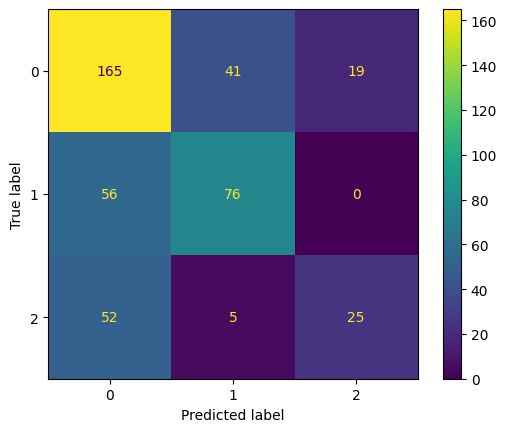

In [252]:
knn_pipeline = Pipeline([("knn", KNeighborsClassifier())])

knn_param_grid = {
    "knn__n_neighbors": [3, 5, 7, 10]  
}

knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
print("Best KNN Parameters:", knn_grid.best_params_)
print("Cross-validated Accuracy (KNN):", knn_grid.best_score_)

y_pred_knn = best_knn.predict(X_test)


knn_cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(knn_cm).plot()
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


## Q3: Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

My metrics are worse than in part 1.  Adding in the hybrid strain made it much harder for the models to predict. The accuracy was worse. 

## Part 3: Multiclass from Binary: Consider two models designed for binary classification: SVC and Logistic Regression.

### Q1

Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:

Indica vs. Not Indica

Sativa vs. Not Sativa

Hybrid vs. Not Hybrid

In [253]:
#create binary coulmns
weed['Indica_or_Not'] = weed['Type'].apply(lambda x: 1 if x == 'indica' else 0)
weed['sativa_or_not'] = weed['Type'].apply(lambda x: 1 if x == 'sativa' else 0)
weed['hybrid_or_not'] = weed['Type'].apply(lambda x: 1 if x == 'hybrid' else 0)

#### Indica log and svc models

In [254]:
#indica
X = weed.drop(columns=["Strain", "Type", "Type_encoded", "Effects", "Flavor",'hybrid_or_not',"sativa_or_not", "Indica_or_Not"])
y = weed["Indica_or_Not"]

Accuracy: 0.7904328018223234
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       307
           1       0.65      0.64      0.65       132

    accuracy                           0.79       439
   macro avg       0.75      0.75      0.75       439
weighted avg       0.79      0.79      0.79       439

Accuracy: 0.7904328018223234
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       307
           1       0.65      0.64      0.65       132

    accuracy                           0.79       439
   macro avg       0.75      0.75      0.75       439
weighted avg       0.79      0.79      0.79       439



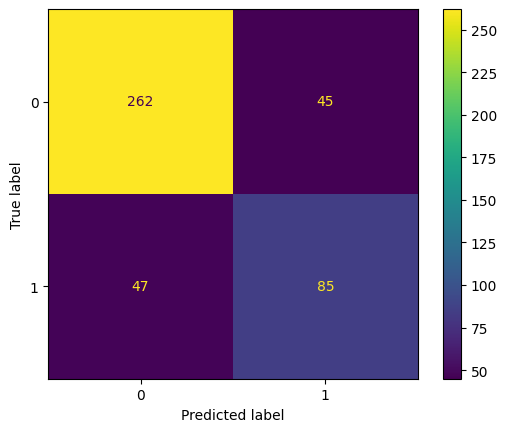

In [255]:
#indica log
y = weed["Indica_or_Not"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
#PIPELINE
logreg_pipeline = Pipeline([("logreg", LogisticRegression(random_state=42))])
logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy)
log_cm = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(log_cm).plot()
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Accuracy (SVC): 0.7608200455580866
Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.60      0.59      0.60       132

    accuracy                           0.76       439
   macro avg       0.72      0.71      0.71       439
weighted avg       0.76      0.76      0.76       439

Accuracy (SVC): 0.7608200455580866
Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.60      0.59      0.60       132

    accuracy                           0.76       439
   macro avg       0.72      0.71      0.71       439
weighted avg       0.76      0.76      0.76       439



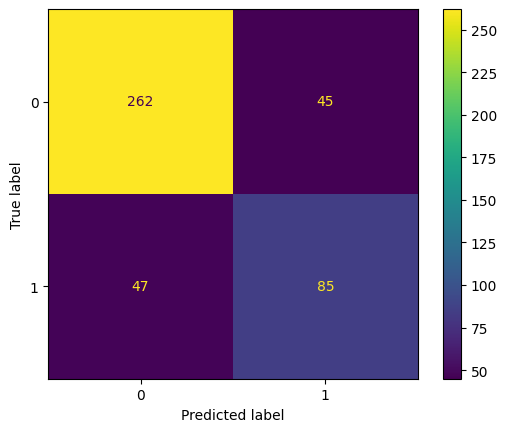

In [256]:
#indica svc
y = weed["Indica_or_Not"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

svc_pipeline = Pipeline([("svc", SVC(random_state=42, C = 100, degree = 3))])
svc_pipeline.fit(X_train, y_train)
#pred
y_pred_svc = svc_pipeline.predict(X_test)

#ACCURACY 
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy (SVC):", accuracy)

# classification report
print("Classification Report (SVC):\n", classification_report(y_test, y_pred_svc))

#cm
cm = confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(log_cm).plot()

#### sativa models

Accuracy: 0.8291571753986332
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       357
           1       0.57      0.35      0.44        82

    accuracy                           0.83       439
   macro avg       0.72      0.65      0.67       439
weighted avg       0.81      0.83      0.81       439

Accuracy: 0.8291571753986332
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       357
           1       0.57      0.35      0.44        82

    accuracy                           0.83       439
   macro avg       0.72      0.65      0.67       439
weighted avg       0.81      0.83      0.81       439



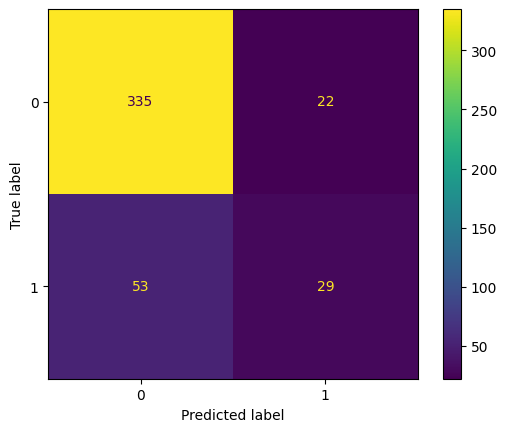

In [257]:
#stativa
y = weed["sativa_or_not"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
#PIPELINE
logreg_pipeline = Pipeline([("logreg", LogisticRegression(random_state=42))])
logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy)
log_cm = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(log_cm).plot()
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Sativa had the best accuracy value for logistic models at .83.

Accuracy (SVC): 0.7767653758542141
Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       357
           1       0.38      0.30      0.34        82

    accuracy                           0.78       439
   macro avg       0.61      0.60      0.60       439
weighted avg       0.76      0.78      0.77       439

Accuracy (SVC): 0.7767653758542141
Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       357
           1       0.38      0.30      0.34        82

    accuracy                           0.78       439
   macro avg       0.61      0.60      0.60       439
weighted avg       0.76      0.78      0.77       439



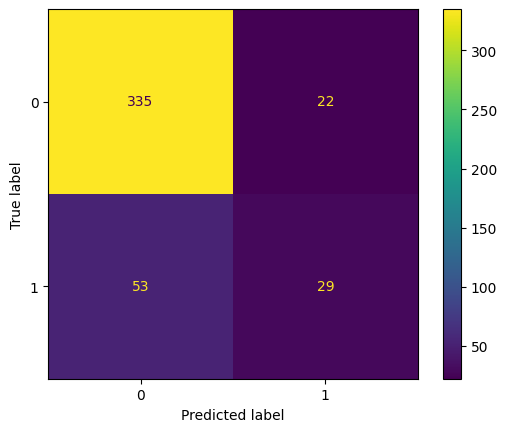

In [258]:
#sativa svc
y = weed["sativa_or_not"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
svc_pipeline = Pipeline([("svc", SVC(random_state=42, C = 100, degree = 3))])
svc_pipeline.fit(X_train, y_train)
#pred
y_pred_svc = svc_pipeline.predict(X_test)

#ACCURACY 
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy (SVC):", accuracy)

# classification report
print("Classification Report (SVC):\n", classification_report(y_test, y_pred_svc))

#cm
cm = confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(log_cm).plot()

Sativa also had the best SVC accuracy at .78.

#### hybrid

Accuracy: 0.6127562642369021
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.55      0.58       214
           1       0.61      0.68      0.64       225

    accuracy                           0.61       439
   macro avg       0.61      0.61      0.61       439
weighted avg       0.61      0.61      0.61       439

Accuracy: 0.6127562642369021
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.55      0.58       214
           1       0.61      0.68      0.64       225

    accuracy                           0.61       439
   macro avg       0.61      0.61      0.61       439
weighted avg       0.61      0.61      0.61       439



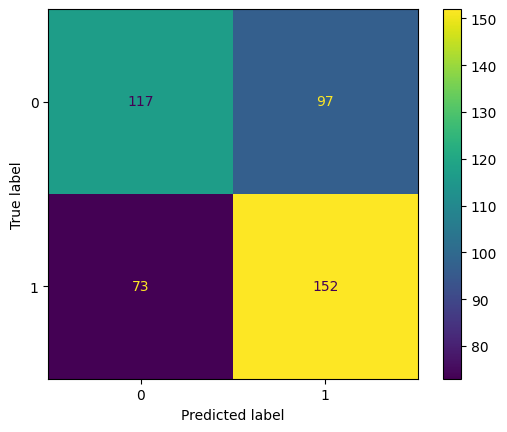

In [259]:
#hybrid
y = weed["hybrid_or_not"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
#PIPELINE
logreg_pipeline = Pipeline([("logreg", LogisticRegression(random_state=42))])
logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy)
log_cm = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(log_cm).plot()
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

In [260]:
#hybrid svc
y = weed["hybrid_or_not"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

svc_pipeline = Pipeline([("svc", SVC(random_state=42, C = 100, degree = 3))])
svc_pipeline.fit(X_train, y_train)
#pred
y_pred_svc = svc_pipeline.predict(X_test)

#ACCURACY 
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy (SVC):", accuracy)

# classification report
print("Classification Report (SVC):\n", classification_report(y_test, y_pred_svc))


Accuracy (SVC): 0.5671981776765376
Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.56      0.51      0.53       214
           1       0.57      0.62      0.60       225

    accuracy                           0.57       439
   macro avg       0.57      0.57      0.57       439
weighted avg       0.57      0.57      0.57       439

Accuracy (SVC): 0.5671981776765376
Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.56      0.51      0.53       214
           1       0.57      0.62      0.60       225

    accuracy                           0.57       439
   macro avg       0.57      0.57      0.57       439
weighted avg       0.57      0.57      0.57       439



### Q2: Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

The model that had the best accuracy score was for the logistic regression with an accuracy score of .83. The hybrid SVC model did the wors with an accuracy score of .57. This aligns with the values we got for other accuracy values. The models had a hard time predicting hybrid values because they are  a mox of both sativa and indica. This makes sense. SVC models overall had a lower accuracy rate than logistic.

### Q3: Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

#### 1.Indica vs. Sativa

#### 2.Indica vs. Hybrid

#### 3.Hybrid vs. Sativa

In [261]:
#create new data frames: binary for OvO with two strain types
indica_sativa = weed[(weed['Type'] == 'indica') | (weed['Type'] == 'sativa')]

indica_hybrid = weed[(weed['Type'] == 'indica') | (weed['Type'] == 'hybrid')]

hybrid_sativa = weed[(weed['Type'] == 'hybrid') | (weed['Type'] == 'sativa')]

In [262]:
#Sativa v Indica LOG
X = indica_sativa.drop(columns=["Strain", "Type", "Effects", "Flavor",'hybrid_or_not',"sativa_or_not", "Indica_or_Not", "Type_encoded" ], axis= 1)
y = indica_sativa["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
#PIPELINE
logreg_pipeline = Pipeline([("logreg", LogisticRegression(random_state=42))])
logreg_pipeline.fit(X_train, y_train)
y_pred= logreg_pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      indica       0.88      0.93      0.90       132
      sativa       0.88      0.79      0.83        82

    accuracy                           0.88       214
   macro avg       0.88      0.86      0.87       214
weighted avg       0.88      0.88      0.88       214

Classification Report:
               precision    recall  f1-score   support

      indica       0.88      0.93      0.90       132
      sativa       0.88      0.79      0.83        82

    accuracy                           0.88       214
   macro avg       0.88      0.86      0.87       214
weighted avg       0.88      0.88      0.88       214



Sativa and indica had the best accuracy for log models.

In [265]:
#Sativa v Indica svc
X = indica_sativa.drop(columns=["Strain", "Type", "Effects", "Flavor",'hybrid_or_not',"sativa_or_not", "Indica_or_Not", "Type_encoded" ], axis= 1)
y = indica_sativa["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

svc_pipeline = Pipeline([("svc", SVC(random_state=42, C = 100, degree = 3))])
svc_pipeline.fit(X_train, y_train)
#pred
y_pred_svc = svc_pipeline.predict(X_test)

#ACCURACY 
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy (SVC):", accuracy)

# classification report
print("Classification Report (SVC):\n", classification_report(y_test, y_pred_svc))


Accuracy (SVC): 0.8364485981308412
Classification Report (SVC):
               precision    recall  f1-score   support

      indica       0.85      0.89      0.87       132
      sativa       0.81      0.74      0.78        82

    accuracy                           0.84       214
   macro avg       0.83      0.82      0.82       214
weighted avg       0.84      0.84      0.83       214

Accuracy (SVC): 0.8364485981308412
Classification Report (SVC):
               precision    recall  f1-score   support

      indica       0.85      0.89      0.87       132
      sativa       0.81      0.74      0.78        82

    accuracy                           0.84       214
   macro avg       0.83      0.82      0.82       214
weighted avg       0.84      0.84      0.83       214



In [263]:
# indica v hybrid LOG
X = indica_hybrid .drop(columns=["Strain", "Type", "Effects", "Flavor",'hybrid_or_not',"sativa_or_not", "Indica_or_Not", "Type_encoded" ], axis= 1)
y = indica_hybrid ["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
#PIPELINE
logreg_pipeline = Pipeline([("logreg", LogisticRegression(random_state=42))])
logreg_pipeline.fit(X_train, y_train)
y_pred= logreg_pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      hybrid       0.79      0.82      0.80       225
      indica       0.67      0.62      0.64       132

    accuracy                           0.75       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.74      0.75      0.74       357

Classification Report:
               precision    recall  f1-score   support

      hybrid       0.79      0.82      0.80       225
      indica       0.67      0.62      0.64       132

    accuracy                           0.75       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.74      0.75      0.74       357



In [266]:
# indica and hybrid SVC
X = indica_hybrid .drop(columns=["Strain", "Type", "Effects", "Flavor",'hybrid_or_not',"sativa_or_not", "Indica_or_Not", "Type_encoded" ], axis= 1)
y = indica_hybrid ["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

svc_pipeline = Pipeline([("svc", SVC(random_state=42, C = 100, degree = 3))])
svc_pipeline.fit(X_train, y_train)
#pred
y_pred_svc = svc_pipeline.predict(X_test)

#ACCURACY 
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy (SVC):", accuracy)

# classification report
print("Classification Report (SVC):\n", classification_report(y_test, y_pred_svc))

Accuracy (SVC): 0.7058823529411765
Classification Report (SVC):
               precision    recall  f1-score   support

      hybrid       0.78      0.74      0.76       225
      indica       0.59      0.64      0.62       132

    accuracy                           0.71       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.71      0.71      0.71       357

Accuracy (SVC): 0.7058823529411765
Classification Report (SVC):
               precision    recall  f1-score   support

      hybrid       0.78      0.74      0.76       225
      indica       0.59      0.64      0.62       132

    accuracy                           0.71       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.71      0.71      0.71       357



In [264]:
# hybrid v sativa LOG 
X = hybrid_sativa .drop(columns=["Strain", "Type", "Effects", "Flavor",'hybrid_or_not',"sativa_or_not", "Indica_or_Not", "Type_encoded" ], axis= 1)
y = hybrid_sativa ["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
#PIPELINE
logreg_pipeline = Pipeline([("logreg", LogisticRegression(random_state=42))])
logreg_pipeline.fit(X_train, y_train)
y_pred= logreg_pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      hybrid       0.77      0.91      0.84       225
      sativa       0.51      0.26      0.34        82

    accuracy                           0.74       307
   macro avg       0.64      0.58      0.59       307
weighted avg       0.70      0.74      0.70       307

Classification Report:
               precision    recall  f1-score   support

      hybrid       0.77      0.91      0.84       225
      sativa       0.51      0.26      0.34        82

    accuracy                           0.74       307
   macro avg       0.64      0.58      0.59       307
weighted avg       0.70      0.74      0.70       307



In [267]:
# hybrid v sativa SVC 
X = hybrid_sativa .drop(columns=["Strain", "Type", "Effects", "Flavor",'hybrid_or_not',"sativa_or_not", "Indica_or_Not", "Type_encoded" ], axis= 1)
y = hybrid_sativa ["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

svc_pipeline = Pipeline([("svc", SVC(random_state=42, C = 100, degree = 3))])
svc_pipeline.fit(X_train, y_train)
#pred
y_pred_svc = svc_pipeline.predict(X_test)

#ACCURACY 
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy (SVC):", accuracy)

# classification report
print("Classification Report (SVC):\n", classification_report(y_test, y_pred_svc))

Accuracy (SVC): 0.6775244299674267
Classification Report (SVC):
               precision    recall  f1-score   support

      hybrid       0.78      0.78      0.78       225
      sativa       0.40      0.40      0.40        82

    accuracy                           0.68       307
   macro avg       0.59      0.59      0.59       307
weighted avg       0.68      0.68      0.68       307

Accuracy (SVC): 0.6775244299674267
Classification Report (SVC):
               precision    recall  f1-score   support

      hybrid       0.78      0.78      0.78       225
      sativa       0.40      0.40      0.40        82

    accuracy                           0.68       307
   macro avg       0.59      0.59      0.59       307
weighted avg       0.68      0.68      0.68       307



### Q4: Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

The log model for indica and sativa had the best accuracy parameter at .88. The worst model at predicting accuracy was the SVC for hybrid and sativa. This makes sense, especially after getting the results from the 6 models above. It also makes intuitive sense because it is harder to predict for hybrid and sativa.

### Q5: Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?
### What about for SVC?

Logistic Regression defaults to using the OvR approach while SVC defaults to the OvO approach. This is why we had to chose and specifiy exactly what we wanted from our models.

Chat GPT helped write and debug code in areas through this lab. it also helped to understand concepts and various parameters.